In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,...,x8_superhydride,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 64
0,0,0,0,0,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,3.5000,562,618.0,56.0
1,1,1,1,1,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.8000,473,613.4,140.4
2,2,2,2,2,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.8000,524,613.4,89.4
3,3,3,3,3,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.9250,538,617.0,79.0
4,4,4,4,4,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,3.1000,576,624.6,48.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,152,152,-0.467859,-0.729457,-0.258929,0.421871,-0.453863,-0.800754,...,0,0,0,0,0,0,3.3750,552,601.0,49.0
152,152,153,153,153,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,8.3000,532,590.0,58.0
153,153,154,154,154,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,3.1250,570,610.4,40.4
154,154,155,155,155,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,2.8500,562,594.2,32.2


In [3]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium trifluoroacetate',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphorus trichloride',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_None',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x7_None',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]
#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.3, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.3, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.3, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [10:23<00:00, 25.96s/it]

0.2389893617021277 5 16 7


### 2D. Decision Tree 

In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 48, 1):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [04:58<00:00, 10.30s/it]

0.2502925531914894 20 6 24


### 3D. Random Forest

In [6]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 40, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [14:20<00:00, 28.67s/it]

0.2678409574468085 10 2 28


### 4D. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:17<00:00,  2.18it/s]

0.2953324468085106 2 38


### Saving Decision Tree model

In [16]:
ET_regr_d = ExtraTreesRegressor(n_estimators=5, 
                                            max_features=16,
                                            random_state=7)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr_d.predict(X_test_d))
joblib.dump(ET_regr_d, "./model_SO_diameter_ExtraTrees.joblib")

['./model_SO_diameter_ExtraTrees.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [8]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:13<00:00, 20.57s/it]

14.194326241134744 3 21 32


### 2E. Decision Trees

In [9]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 1):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [05:41<00:00, 11.78s/it]

14.599999999999996 18 2 38


### 3E. Random Forest

In [10]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 27)):
    for j in range(1, 27):
        for k in range(2, 46, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 26/26 [14:34<00:00, 33.65s/it]

16.095309017223904 10 4 10


### 4E. K Neighbors

In [11]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:20<00:00,  1.90it/s]

20.553191489361698 1 1


### Saving Extra Trees model

In [33]:
ET_regr_e = ExtraTreesRegressor(n_estimators=18, 
                                            max_features=21,
                                            random_state=32)
            
ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

joblib.dump(ET_regr_e, "./model_SO_emission_ExtraTrees.joblib")

['./model_SO_emission_ExtraTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [12]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 48, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [16:22<00:00, 33.86s/it]

20.44148936170213 4 16 14


### 2A. Decision Trees


In [13]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 28)):
    for j in range(1, 28):
        for k in range(4, 46, 1):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 27/27 [03:56<00:00,  8.74s/it]

24.087234042553188 12 19 44


In [ ]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

### 3A. Random Forest

In [14]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 42, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [10:32<00:00, 26.37s/it]

24.75670051579626 7 4 29


### 4A. K Neighbors

In [15]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:20<00:00,  1.93it/s]

29.872340425531913 2 2


### Saving model

In [18]:
ET_regr_a = ExtraTreesRegressor(n_estimators=4, 
                                            max_features=16,
                                            random_state=14)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

joblib.dump(ET_regr_a, "./model_SO_abs_ExtraTrees.joblib")

['./model_SO_abs_ExtraTrees.joblib']

## Analyzing

In [20]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=5, 
                                            max_features=16,
                                            random_state=7)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=18, 
                                            max_features=21,
                                            random_state=32)
            
ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=4, 
                                            max_features=16,
                                            random_state=4)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.73668                0.238989              0.144575                   0.380231
Absorption  0.422766              30.9894             1548.31                      39.3485
Emission    0.515682              17.2704              717.587                     26.7878


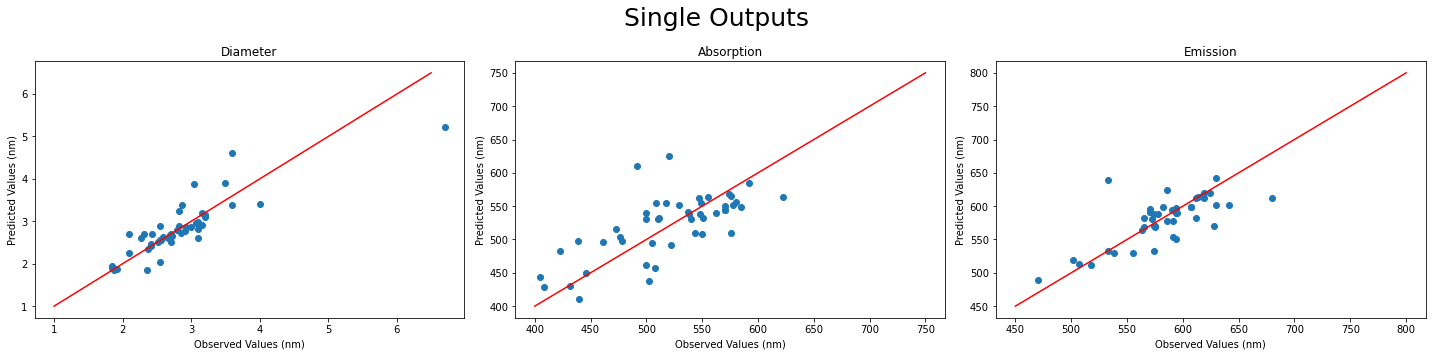

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, ET_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, ET_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [22]:
importance_dict_d = dict()
for i in range(0,58):
    importance_dict_d[input_col[i]] = ET_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('time_min', 0.32808699158783244),
 ('x0_indium trifluoroacetate', 0.1355904454601718),
 ('x7_zinc iodide', 0.0709001003627628),
 ('x1_tris(dimethylamino)phosphine', 0.06434904378446536),
 ('amine_amount_mmol', 0.05326493999978636),
 ('total_volume_ml', 0.04144816509713936),
 ('x8_trioctylphosphine oxide', 0.03332333622900576),
 ('temp_c', 0.03112906468522663),
 ('x8_trioctylamine', 0.02927805384678046),
 ('p_amount_mmol', 0.025162804218861357),
 ('x0_indium iodide', 0.01963017774739606),
 ('x8_water', 0.017837065779532875),
 ('in_amount_mmol', 0.015784500837688335),
 ('acid_amount_mmol', 0.014633097675553746),
 ('x5_None', 0.0116820864177045),
 ('x5_octylamine', 0.010098933724863502),
 ('zinc_amount_mmol', 0.008520377131989146),
 ('other_amount_mmol', 0.008203979101382089),
 ('x5_oleylamine', 0.00745861985272842),
 ('x8_copper bromide', 0.007306595842669089),
 ('x1_tris(trimethylsilyl)phosphine', 0.006380014039259087),
 ('x4_myristic acid', 0.0053483271444681344),
 ('x2_None', 0.0052

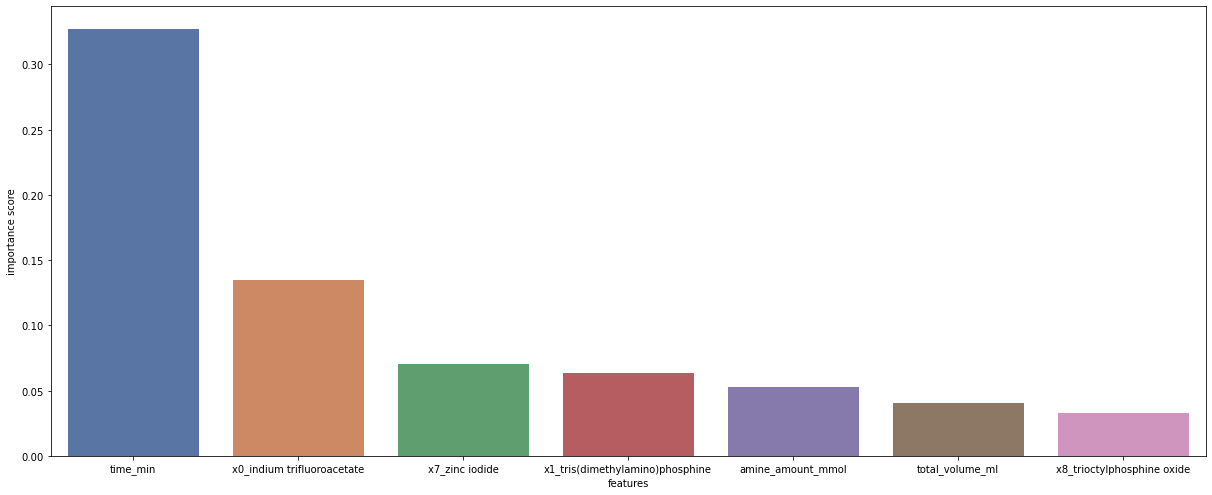

In [23]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [24]:
importance_dict_e = dict()
for i in range(0,58):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('x7_None', 0.14459239883709155),
 ('time_min', 0.10017624429208866),
 ('temp_c', 0.09901281367994494),
 ('zinc_amount_mmol', 0.08112507194499892),
 ('x7_zinc oleate', 0.08030082840150171),
 ('x7_zinc iodide', 0.046579798510442444),
 ('x7_zinc chloride', 0.03654248808694348),
 ('acid_amount_mmol', 0.036502884396596866),
 ('p_amount_mmol', 0.02946381477029448),
 ('x0_indium iodide', 0.02657094553505085),
 ('in_amount_mmol', 0.025768199877811447),
 ('x8_None', 0.023480422674695973),
 ('x5_None', 0.01791136144898555),
 ('x4_stearic acid', 0.01735607278485225),
 ('other_amount_mmol', 0.017331953386782204),
 ('x1_tris(dimethylamino)phosphine', 0.01709389895845844),
 ('amine_amount_mmol', 0.012921889368278289),
 ('x8_copper bromide', 0.012778355973142586),
 ('x0_indium chloride', 0.012502757974945189),
 ('x2_octadecene', 0.011646853705073392),
 ('x7_zinc bromide', 0.011588267132761463),
 ('x3_trioctylphosphine', 0.01101373763585922),
 ('total_volume_ml', 0.00980785129124604),
 ('x8_trioctyl

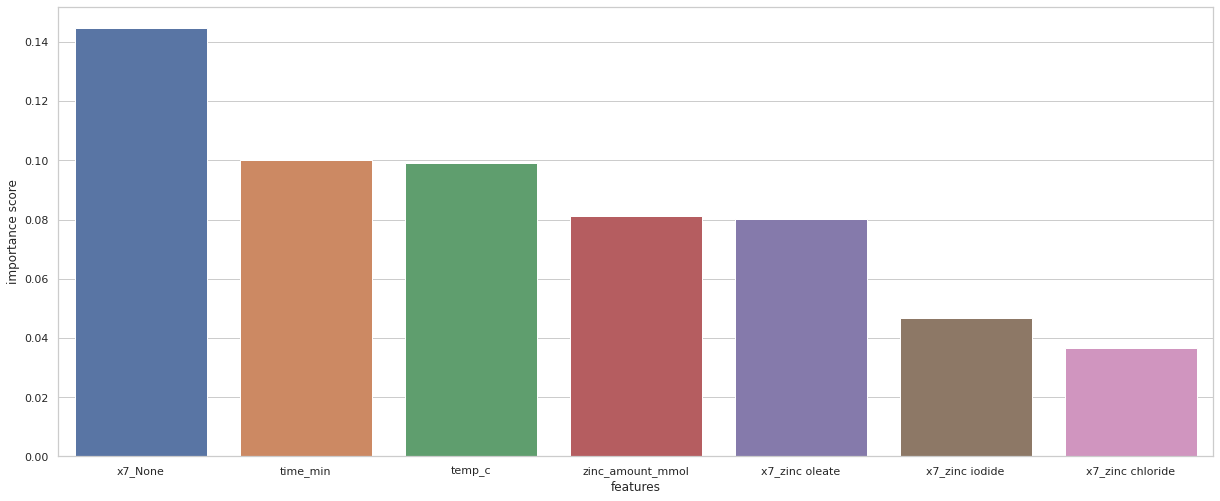

In [25]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [26]:
importance_dict_a = dict()
for i in range(0,58):
    importance_dict_a[input_col[i]] = ET_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('time_min', 0.18432611435009832),
 ('temp_c', 0.1818911261492949),
 ('zinc_amount_mmol', 0.05606782554222582),
 ('acid_amount_mmol', 0.04706397585039995),
 ('x7_zinc oleate', 0.045015043034389815),
 ('in_amount_mmol', 0.03938661554394668),
 ('total_volume_ml', 0.037261643417691406),
 ('x8_water', 0.030764594281939745),
 ('x8_copper bromide', 0.02922686491326776),
 ('x3_None', 0.028690186373703436),
 ('x7_zinc chloride', 0.028550073802275422),
 ('x7_None', 0.027500851509772054),
 ('x4_myristic acid', 0.02686742630914086),
 ('x7_zinc iodide', 0.019743120009400556),
 ('x4_None', 0.01875763768198923),
 ('x1_tris(diethylamino)phosphine', 0.018359372822522084),
 ('amine_amount_mmol', 0.018027958458058026),
 ('x5_None', 0.017736835682687958),
 ('other_amount_mmol', 0.012541153088892035),
 ('p_amount_mmol', 0.01244157557883328),
 ('x8_trioctylamine', 0.012159554373235983),
 ('x4_stearic acid', 0.011999720019905458),
 ('x7_zinc bromide', 0.009003482757688731),
 ('x8_trioctylphosphine oxide', 

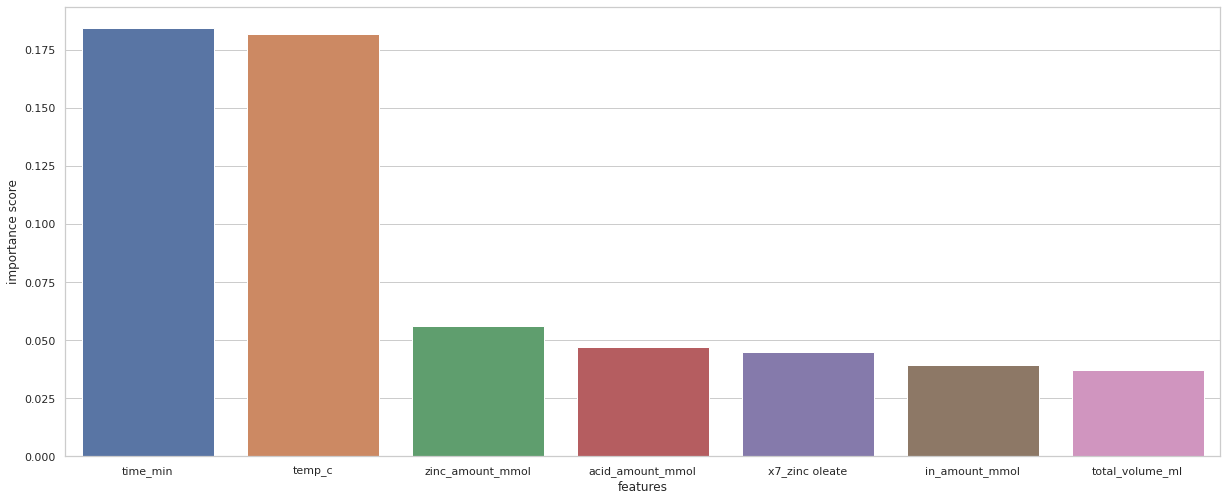

In [27]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [28]:
importance_dict_a

{'in_amount_mmol': 0.03938661554394668,
 'p_amount_mmol': 0.01244157557883328,
 'sol_amount_ml': 0.00497250181632698,
 'TOP_amount_mmol': 0.005683493663570902,
 'acid_amount_mmol': 0.04706397585039995,
 'amine_amount_mmol': 0.018027958458058026,
 'thiol_amount_mmol': 0.0,
 'zinc_amount_mmol': 0.05606782554222582,
 'other_amount_mmol': 0.012541153088892035,
 'total_volume_ml': 0.037261643417691406,
 'temp_c': 0.1818911261492949,
 'time_min': 0.18432611435009832,
 'x0_indium acetate': 0.00314867293714595,
 'x0_indium bromide': 0.002009787051154732,
 'x0_indium chloride': 0.003615187998909173,
 'x0_indium iodide': 0.006530250523913645,
 'x0_indium myristate': 0.0,
 'x0_indium trifluoroacetate': 0.0006183229733398943,
 'x1_bis(trimethylsilyl)phosphine': 0.0,
 'x1_phosphorus trichloride': 0.0012663503854400834,
 'x1_tris(diethylamino)phosphine': 0.018359372822522084,
 'x1_tris(dimethylamino)phosphine': 0.0,
 'x1_tris(trimethylgermyl)phosphine': 0.0005945016235621317,
 'x1_tris(trimethylsily

### Combine


In [29]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [30]:
sorted_d 

[('TOP_amount_mmol', 0.0013468794500316459),
 ('acid_amount_mmol', 0.014633097675553746),
 ('amine_amount_mmol', 0.05326493999978636),
 ('in_amount_mmol', 0.015784500837688335),
 ('other_amount_mmol', 0.008203979101382089),
 ('p_amount_mmol', 0.025162804218861357),
 ('sol_amount_ml', 0.0014565764031341563),
 ('temp_c', 0.03112906468522663),
 ('thiol_amount_mmol', 0.0),
 ('time_min', 0.32808699158783244),
 ('total_volume_ml', 0.04144816509713936),
 ('x0_indium acetate', 0.001957173765601087),
 ('x0_indium bromide', 0.00010506649242879272),
 ('x0_indium chloride', 0.0014154229115394775),
 ('x0_indium iodide', 0.01963017774739606),
 ('x0_indium myristate', 0.0009508791814421165),
 ('x0_indium trifluoroacetate', 0.1355904454601718),
 ('x1_bis(trimethylsilyl)phosphine', 4.314381985475133e-05),
 ('x1_phosphorus trichloride', 0.0002700576869073098),
 ('x1_tris(diethylamino)phosphine', 0.00395031685008979),
 ('x1_tris(dimethylamino)phosphine', 0.06434904378446536),
 ('x1_tris(trimethylgermyl)p

In [31]:
combined_importance = dict()

In [32]:
for i in range(0,71):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


IndexError: list index out of range

In [30]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('time_min', 0.3872562339475478),
 ('temp_c', 0.3216737419642217),
 ('x0_indium trifluoroacetate', 0.2834885125490062),
 ('x7_zinc iodide', 0.2723986410800271),
 ('total_volume_ml', 0.2674964373401648),
 ('x7_zinc bromide', 0.12329813949250065),
 ('acid_amount_mmol', 0.11506402357882795),
 ('x7_zinc oleate', 0.11183675782485239),
 ('x0_indium acetate', 0.10910125442900923),
 ('x4_myristic acid', 0.10229340390208516),
 ('x7_None', 0.08627551234812816),
 ('p_amount_mmol', 0.08135532959305466),
 ('x0_indium iodide', 0.0750972416516475),
 ('zinc_amount_mmol', 0.07073262501564995),
 ('amine_amount_mmol', 0.06080881474654413),
 ('in_amount_mmol', 0.05178417815078243),
 ('x5_dioctylamine', 0.047583032410539336),
 ('x7_zinc chloride', 0.04546968404496203),
 ('other_amount_mmol', 0.03368623485490694),
 ('x4_oleic acid', 0.03309251810969427),
 ('x1_tris(dimethylamino)phosphine', 0.02835231528073659),
 ('x8_water', 0.026176693500295934),
 ('x2_octadecene', 0.024935156804378376),
 ('x5_octylamine

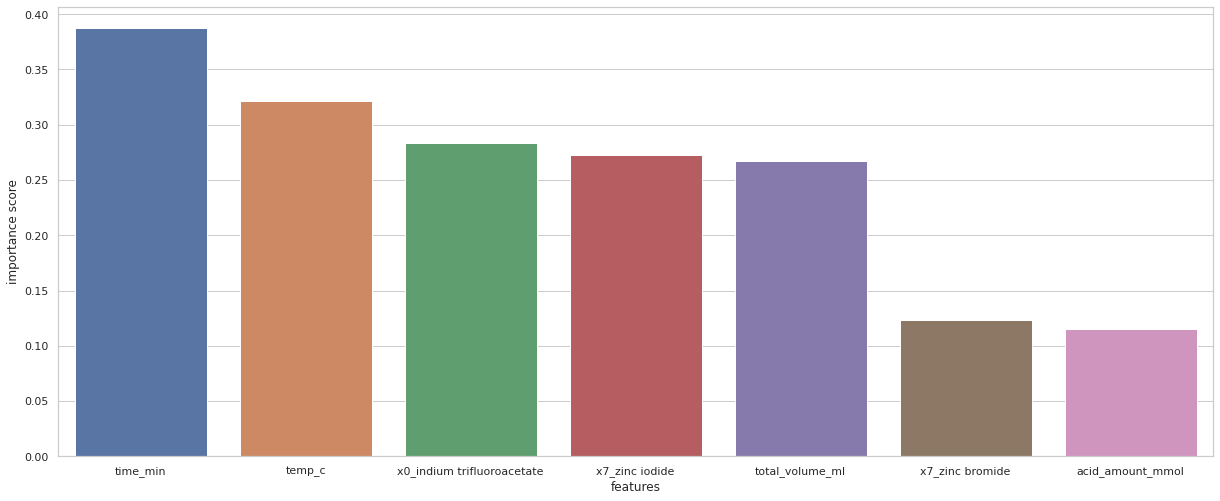

In [31]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)

## Correlation

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
df["MEDV"] = x.target
X_cor = df.drop("MEDV",1)   #Feature Matrix
y_cor = df["MEDV"]          #Target Variable
df.head()